In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from tqdm import tqdm as tqdm

import wandb
from elastic_nerf.utils import dataset_utils as du
from elastic_nerf.utils import notebook_utils as nu
from elastic_nerf.utils import plotting_utils as pu
from elastic_nerf.utils import results_utils as ru
from elastic_nerf.utils import wandb_utils as wu
from elastic_nerf.utils.experiments.sweeps import SWEEPS

pio.renderers.default = "plotly_mimetype+notebook_connected"
pd.set_option("display.max_columns", None)

In [ ]:
sweep_id = "bj5mkdex"

# Get the runs from sweep.
tables = ["EvalResultsSummarytable", "EvalResultstable"]
wu.remove_sweep_results_cache(sweep_id)
ngp_occ_blender_results = wu.fetch_sweep_results(
    sweep_id, refresh_cache=True, download_history=True
)

(gonas) [INFO] Removed cached results for sweep bj5mkdex.


Downloaded history for run jumaq83y
Downloaded history for run pq8hzwi5
Downloaded history for run 0dphxlwe
Downloaded history for run rafk1vh2
Downloaded history for run mdmcrcix
Downloaded history for run grhx3tuo


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


Downloaded history for run a0h0hci4
Downloaded history for run 07mavept


(gonas) [INFO] Fetched 8 finished runs out of 8 total runs.
(gonas) [INFO] Cached results for sweep bj5mkdex.


In [ ]:
ngp_occ_blender_results[0].history.iloc[20000]["parameters/mlp_base.params"]["values"]

[1,
 0,
 1,
 0,
 2,
 0,
 3,
 0,
 3,
 1,
 14,
 7,
 15,
 17,
 35,
 49,
 103,
 214,
 478,
 837,
 1478,
 2897,
 5897,
 13777,
 33635,
 99214,
 639453,
 10375910.0,
 1225480.0,
 135299,
 42229,
 15683,
 5772,
 2291,
 967,
 515,
 262,
 184,
 108,
 72,
 36,
 18,
 11,
 5,
 4,
 3,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

[<matplotlib.lines.Line2D>]

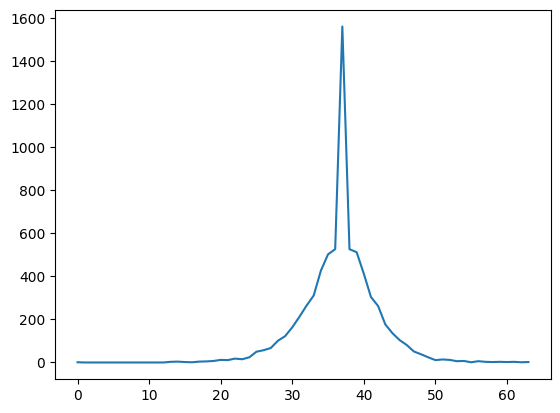

In [ ]:
plt.plot(
    ngp_occ_blender_results[0].history.iloc[20000]["parameters/mlp_head.params"][
        "values"
    ]
)

In [ ]:
print(list(ngp_occ_blender_results[0].history.columns))

['Eval Results/psnr/elastic_64', 'Eval Results Summary/elapsed_time', 'Eval Results Summary/num_updates_skipped/elastic_64', 'Train/num_updates_skipped/elastic_64', 'Train/max_depth/elastic_64', 'Train/target_num_rays/elastic_64', 'parameters/mlp_head.params', 'Eval Results/ssim/elastic_64', 'Train/num_rays/elastic_64', 'Train/loss/elastic_64', 'Eval Results Summary/lpips_avg/elastic_64', 'gradients/mlp_base.params', 'Eval Results/n_rendering_samples/elastic_64', 'Eval Results/mse_loss/elastic_64', 'Eval Results/lpips/elastic_64', 'Eval Results/num_sampled_times/elastic_64', 'Eval Results/target_num_rays/elastic_64', 'Eval Results Summary/num_sampled_times/elastic_64', 'Eval Results Summary/table', 'parameters/mlp_base.params', 'Test Image', 'Train/elapsed_time', 'Train/mse_loss/elastic_64', 'Train/n_rendering_samples/elastic_64', 'Eval Results/loss/elastic_64', 'Eval Results/table', 'Eval Results/num_rays/elastic_64', 'Eval Results/elapsed_time', 'Train/psnr/elastic_64', 'Eval Results

In [ ]:
ngp_occ_blender_results[0].tables["EvalResultstable"]

,Step,Index,Granularity,PSNR,SSIM,LPIPS,GT,RGB,Depth,Error,Acc,Scene,Dataset,Hidden Dim,Elastic,Granular Norm,Train Granularities,Sampling Strategy,Num Samples
0,20000,0,elastic_64,39.039570,0.994329,0.010744,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
1,20000,10,elastic_64,39.299900,0.994402,0.009877,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
2,20000,20,elastic_64,36.049839,0.988738,0.017045,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
3,20000,30,elastic_64,36.997917,0.991167,0.013426,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
4,20000,40,elastic_64,36.231056,0.990825,0.011937,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
5,20000,50,elastic_64,37.536041,0.996145,0.005955,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
6,20000,60,elastic_64,37.348022,0.993190,0.008737,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
7,20000,70,elastic_64,34.955151,0.986950,0.019625,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
8,20000,80,elastic_64,38.830776,0.992877,0.014147,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
9,20000,90,elastic_64,38.292366,0.990792,0.018364,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",mic,blender,64,False,False,1,exp-reverse,1
